![title](https://i.pinimg.com/236x/ce/b4/18/ceb41806c3fcf8216de0086ade094e71.jpg)

## Prêmio France Football

Bola de Ouro (no original em francês Ballon d'Or) é um prêmio de futebol criado pela revista francesa France Football. A honraria já foi conhecida mundialmente como Futebolista do Ano na Europa, sendo entregue de forma independente entre 1956 e 2009 e novamente a partir de 2016, após fim da parceria com a FIFA.

Faremos algumas análises dos vencedores do prêmio, com duas rotinas diferentes de coleta dos dados. Ambas por Web Scraping, mas de fontes e manipulações diferentes.

### Importando as bibliotecas

In [1]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.io.html import read_html
from IPython.display import clear_output

import requests
from bs4 import BeautifulSoup
import re

## Web Scraping (Opção 1)

Nesta primeira análise, os dados serão coletados de três páginas diferentes e, após a extração, haverá a concatenação das informações em uma única base.

In [2]:
#Tratamento do site de onde os dados serão coletados

#Vencedores até 2009
site_1 = "https://www.ogol.com.br/award.php?id=1"
tabela_1 = read_html(site_1, decimal = ',', thousands = '.')

#Vencedores após 2015
site_2 = "https://www.ogol.com.br/award.php?id=1&id_evento=0&ano=0&mes=0&epoca=0&jornada=0&page=2"
tabela_2 = read_html(site_2, decimal = ',', thousands = '.')

#Vencedores entre 2010 e 2015
site_3 = "https://www.ogol.com.br/award.php?id=2"
tabela_3 = read_html(site_3, decimal = ',', thousands = '.')

In [3]:
#Armazenando os dados da primeira página em um dataframe

tabela_france_1 = pd.DataFrame(tabela_1[1])

In [4]:
#Armazenando os dados da segunda página no dataframe

tabela_france_2 = pd.DataFrame(tabela_2[1])

In [5]:
#Armazenando os dados da terceira página em outro dataframe

tabela_france_3 = pd.DataFrame(tabela_3[1])

In [6]:
#Tratando os dados da terceira página (selecionando apenas as premiações no período de 2010 a 2015)

tabela_france_3 = tabela_france_3.loc[(tabela_france_3.Ano < 2016) & (tabela_france_3.Ano > 2009)]

In [7]:
#Concatenando (unindo) os três dataframes

tabela_france = pd.concat([tabela_france_1, tabela_france_2, tabela_france_3], axis=0, sort=True)

In [8]:
#Organizando as linhas por ordem crescente mediante o ano

tabela_france = tabela_france.sort_values(['Ano'])

In [9]:
#Resetando o index do dataframe gerado

tabela_france = tabela_france.reset_index(drop=True)

In [10]:
#Removendo a feature Votos

tabela_france = tabela_france.drop(columns=['votos'])

In [11]:
#Convertendo a tabela gerada em um DataFrame

df_france = pd.DataFrame(tabela_france)

### Algumas informações básicas do DataFrame

In [12]:
#Quantidade de linhas e colunas

df_france.shape

(64, 3)

In [13]:
#Descrição do Index

df_france.index

RangeIndex(start=0, stop=64, step=1)

In [14]:
#Colunas presentes

df_france.columns

Index(['Ano', 'Equipe', 'Vencedor'], dtype='object')

In [15]:
#Quantidade de dados não-nulos

df_france.count()

Ano         64
Equipe      64
Vencedor    64
dtype: int64

## Web Scraping (Opção 2)

Faremos a extração e o tratamento dos dados para, posteriormente, analisarmos as informações coletadas através de alguns gráficos.

In [16]:
#Extração e armazenamento dos dados

dados_site = "https://www.topendsports.com/sport/soccer/list-player-of-the-year-ballondor.htm"
tabela = read_html(dados_site, decimal = ',', thousands = '.')

In [17]:
#Ordenando por ano e resetando o índice

df_france_football = tabela[0].sort_values(['year']).reset_index(drop=True)

In [18]:
#Retirando a última linha (o prêmio de 2020 não será concedido)

df_france_football = df_france_football.loc[df_france_football.player != 'not awarded']

In [19]:
#Renomeando as colunas

df_france_football.columns = ['ano', 'vencedor', 'nacionalidade', 'clube']

In [24]:
#Lista com os 10 maiores vencedores

df_france_football.groupby(by=['vencedor'])['ano'].count().sort_values(ascending=False).head(10)

vencedor
Lionel Messi             6
Cristiano Ronaldo        5
Michel Platini           3
Johan Cruyff             3
Marco van Basten         3
Kevin Keegan             2
Franz Beckenbauer        2
Karl-Heinz Rummenigge    2
Alfredo Di Stéfano       2
Ronaldo                  2
Name: ano, dtype: int64

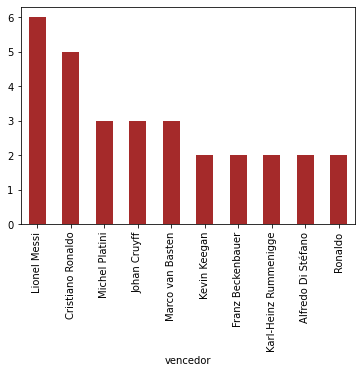

In [30]:
#Agrupando os 10 maiores vencedores pela quantidade de vezes que cada um ganhou o prêmio, em ordem decrescente

df_france_football.groupby(by=['vencedor'])['ano'].count().sort_values(ascending=False).head(10).plot(kind='bar', color="brown")

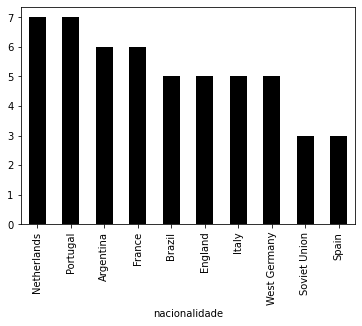

In [29]:
#Agrupando os 10 países com mais vencedores

df_france_football.groupby(by=['nacionalidade'])['ano'].count().sort_values(ascending=False).head(10).plot(kind='bar', color="black")

### Referências

### Dados

### https://www.ogol.com.br/awards.php?op=all
### https://www.topendsports.com/sport/soccer/list-player-of-the-year-ballondor.htm

### Suporte técnico

### https://www.dotnetperls.com/substring-python
### https://www.digitalocean.com/community/tutorials/como-fazer-scraping-em-paginas-web-com-beautiful-soup-and-python-3-pt
### https://www.youtube.com/watch?v=anv-Vt_FL4E
### https://www.youtube.com/watch?v=Vxl5jUltHBo
### https://medium.com/horadecodar/como-fazer-webscraping-com-python-e-beautiful-soup-28a65eee2efd
### https://www.crummy.com/software/BeautifulSoup/bs4/doc/
### https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/
### https://blog.geekhunter.com.br/como-fazer-um-web-scraping-python/
### https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93